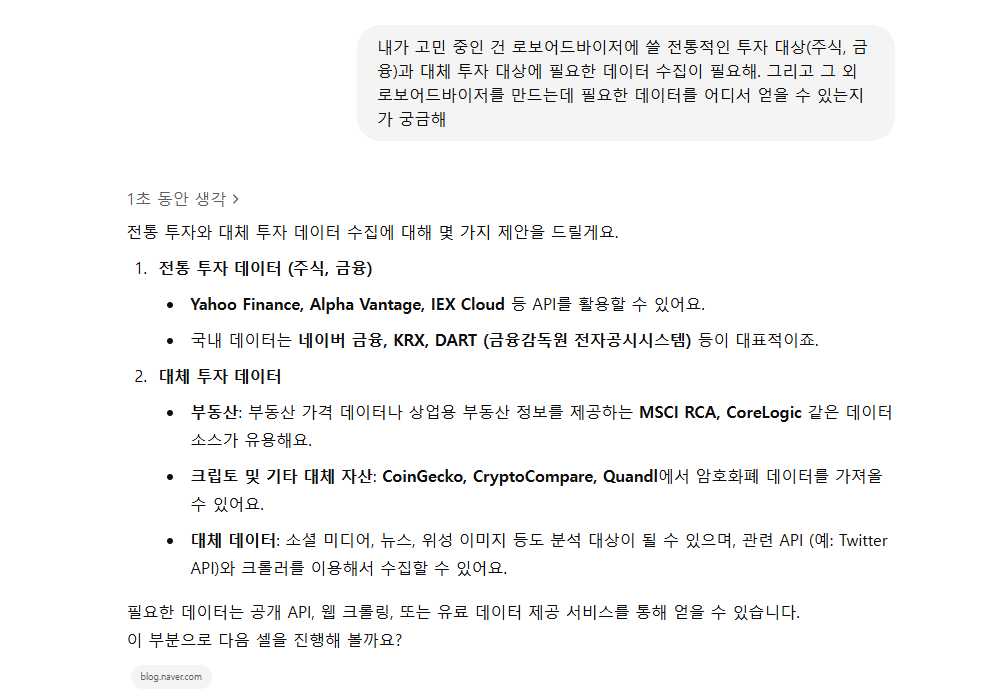

In [1]:
# 첫 번째 셀: 환경 설정 및 라이브러리 임포트
# 이 셀은 로보어드바이저 프로젝트를 위한 기본 환경을 구성하기 위한 첫 단계입니다.

import requests            # API 호출을 위한 HTTP 요청 라이브러리
from bs4 import BeautifulSoup  # 웹 크롤링을 위한 라이브러리
import pandas as pd        # 데이터 분석 및 처리
import numpy as np         # 수치 연산 지원
import time                # 요청 간 딜레이를 위한 타임 모듈

# 환경 설정 완료 메시지 출력
print("환경 설정이 완료되었습니다.")

환경 설정이 완료되었습니다.


In [2]:
# 셀: Yahoo Finance에서 주식 데이터 불러오기
# 1) yfinance 설치
!pip install yfinance  # Yahoo Finance 데이터를 Python으로 손쉽게 불러올 수 있는 라이브러리 :contentReference[oaicite:1]{index=1}

# 2) 라이브러리 임포트
import yfinance as yf
import pandas as pd

# 3) 종목 데이터 다운로드
#    - 삼성전자: ticker "005930.KS" (KRX 상장 종목은 .KS를 접미사로 사용) :contentReference[oaicite:2]{index=2}
#    - 기간: 최근 1년(period="1y"), 빈도: 일간(interval="1d")
stock_df = yf.download("005930.KS", period="1y", interval="1d", auto_adjust=True, progress=False)
# auto_adjust=True를 사용해 분할·배당 조정 종가를 자동 반영 :contentReference[oaicite:3]{index=3}

# 4) 필요한 컬럼만 추출하고 인덱스 이름 설정
stock_df = stock_df[['Open', 'High', 'Low', 'Close', 'Volume']]  # :contentReference[oaicite:4]{index=4}
stock_df.index.name = 'Date'  # DateTimeIndex로 시계열 분석에 용이 :contentReference[oaicite:5]{index=5}

# 5) 데이터 확인
print(stock_df.head())  # 상위 5개 행 출력 :contentReference[oaicite:6]{index=6}
print(stock_df.info())  # 자료형 및 결측치 여부 확인 :contentReference[oaicite:7]{index=7}


Price               Open          High           Low         Close    Volume
Ticker         005930.KS     005930.KS     005930.KS     005930.KS 005930.KS
Date                                                                        
2024-04-17  79352.323105  79450.653121  77582.382812  77582.382812  22611631
2024-04-18  77484.047425  78762.337547  76992.397378  78270.687500  21370190
2024-04-19  76992.403874  77385.723945  75025.803520  76304.093750  31317563
2024-04-22  76107.422861  76205.752864  73845.832776  74829.132812  30469477
2024-04-23  75124.126325  75517.446358  74239.156250  74239.156250  18717699
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2024-04-17 to 2025-04-17
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (Open, 005930.KS)    243 non-null    float64
 1   (High, 005930.KS)    243 non-null    float64
 2   (Low, 005930.KS)     243 non-null    float64
 3   (Close

In [3]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2024-04-17 to 2025-04-17
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (Open, 005930.KS)    243 non-null    float64
 1   (High, 005930.KS)    243 non-null    float64
 2   (Low, 005930.KS)     243 non-null    float64
 3   (Close, 005930.KS)   243 non-null    float64
 4   (Volume, 005930.KS)  243 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.4 KB


In [4]:
# 멀티 인덱스 형태
stock_df.columns

MultiIndex([(  'Open', '005930.KS'),
            (  'High', '005930.KS'),
            (   'Low', '005930.KS'),
            ( 'Close', '005930.KS'),
            ('Volume', '005930.KS')],
           names=['Price', 'Ticker'])

In [5]:
stock_df.isna().sum()
# 결측치 확인 결과 없음.


,,0
Price,Ticker,
Open,005930.KS,0
High,005930.KS,0
Low,005930.KS,0
Close,005930.KS,0
Volume,005930.KS,0


In [6]:
# 빈값은 없지만 멀티 인덱스 구조를 바꿔줘야 함.
# 1. to_flat_index() 를 이용해서 튜플 리스트로 만든다.
flat_cols = stock_df.columns.to_flat_index()
flat_cols

Index([  ('Open', '005930.KS'),   ('High', '005930.KS'),
          ('Low', '005930.KS'),  ('Close', '005930.KS'),
       ('Volume', '005930.KS')],
      dtype='object')

In [7]:
# 2. 튜플을 언더바로 이어붙여서 새 컬럼 이름을 생성한다.
new_cols = [f"{a}_{b}" for a, b in flat_cols]
new_cols

['Open_005930.KS',
 'High_005930.KS',
 'Low_005930.KS',
 'Close_005930.KS',
 'Volume_005930.KS']

In [8]:
# 3. 만들어진 컬럼을 바로 stock_df 에 적용한다.
stock_df.columns = new_cols
stock_df

,Open_005930.KS,High_005930.KS,Low_005930.KS,Close_005930.KS,Volume_005930.KS
Date,,,,,
2024-04-17,79352.323105,79450.653121,77582.382812,77582.382812,22611631
2024-04-18,77484.047425,78762.337547,76992.397378,78270.687500,21370190
2024-04-19,76992.403874,77385.723945,75025.803520,76304.093750,31317563
2024-04-22,76107.422861,76205.752864,73845.832776,74829.132812,30469477
2024-04-23,75124.126325,75517.446358,74239.156250,74239.156250,18717699
...,...,...,...,...,...
2025-04-11,55600.000000,55700.000000,54800.000000,55200.000000,13930480
2025-04-14,56300.000000,56700.000000,55800.000000,56200.000000,12852613
2025-04-15,56300.000000,57100.000000,56200.000000,56600.000000,8998640


In [9]:
# 이제 이를 처음에 크롤링 했던 코드와 합산해본다.
import yfinance as yf
import pandas as pd

def download_and_flatten(tickers, **kwargs):
    # 1) yfinance 다운로드 (복수 티커일 때 멀티인덱스 컬럼)
    df = yf.download(tickers=tickers, **kwargs)

    # 2) 멀티인덱스 여부 확인 후 평탄화
    if isinstance(df.columns, pd.MultiIndex):
        # .to_flat_index() → [(level0, level1), ...]
        flat = df.columns.to_flat_index()
        # 레벨 이름들을 언더바로 이어붙여 ['Open_AAPL', 'High_AAPL', ...]
        df.columns = [f"{lev0}_{lev1}" for lev0, lev1 in flat]  # :contentReference[oaicite:0]{index=0}

    return df

# 사용 예시
stock_df = download_and_flatten(
    tickers=["005930.KS"],      # KRX 삼성전자
    period="1y", interval="1d",
    auto_adjust=True, progress=False
)

print(stock_df.columns)

Index(['Close_005930.KS', 'High_005930.KS', 'Low_005930.KS', 'Open_005930.KS',
       'Volume_005930.KS'],
      dtype='object')


In [10]:
!pip install openpyxl # 엑셀파일 신버전 읽기
!pip install xlrd # 엑셀파일 구버전 읽기

In [11]:
# 위에서는 삼성 전자 주식 하나의 ticker를 tickers에 넣어서 뽑았다.
# 우리가 원하는 것은 자동으로 크롤링 해서 가져오는 구조가 필요하다.
# 모두 뽑으면 너무 많기에, 그 중 10개만 뽑아 오는것으로 방향을 잡는다.
import pandas as pd
import numpy as np
import yfinance as yf
import io

def download_and_flatten(tickers, **kwargs):
    df = yf.download(tickers=tickers, **kwargs)
    if isinstance(df.columns, pd.MultiIndex):
        flat = df.columns.to_flat_index()
        df.columns = [f"{lev0}_{lev1}" for lev0, lev1 in flat]
    return df

# 1) 다운로드 URL
krx_url = (
    "https://kind.krx.co.kr/corpgeneral/corpList.do"
    "?method=download"
    "&searchType=13"
    "&orderMode=3"
    "&orderStat=D"
    "&pageIndex=1"
    "&currentPageSize=5000"
    "&fiscalYearEnd=all"
    "&location=all"
    "&marketType=stockMkt"
)

# 2) 요청하여 바이너리 콘텐츠 획득
resp = requests.get(krx_url, headers={"User-Agent":"Mozilla/5.0"})
resp.raise_for_status()

# 3) BytesIO로 읽어서 pandas로 파싱 (engine='xlrd' 필요)
krx_tables = pd.read_html(resp.text, header=0)
krx_df = krx_tables[0]

# 4) 컬럼명 한글 → 영문 변경 및 코드 포맷팅
krx_df.rename(columns={'종목코드':'code','회사명':'name'}, inplace=True)
krx_df['code'] = krx_df['code'].astype(int).astype(str).str.zfill(6) + '.KS'

print(krx_df[['code','name']].head(7))

        code     name
0  480370.KS   씨케이솔루션
1  031210.KS   서울보증보험
2  064400.KS   LG씨엔에스
3  499790.KS    GS피앤엘
4  484870.KS   엠앤씨솔루션
5  415640.KS  KB발해인프라
6  475560.KS    더본코리아


<ipython-input-11-d4c3a05d16f6>:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  krx_tables = pd.read_html(resp.text, header=0)


In [ ]:
# 대체 투자 상품들(금, 은, 부동산)
# 셀: 대체 투자 상품 데이터 불러오기

# 1) 필수 라이브러리 설치
!pip install yfinance pandas_datareader  # yfinance, pandas_datareader 설치

# 2) 임포트
import yfinance as yf
import pandas as pd
from pandas_datareader import data as pdr
import datetime

In [16]:
# 기간 설정: 최근 1년
end = datetime.datetime.today()
start = end - datetime.timedelta(days=365)

# 3) 부동산 ETF (미국 리츠 ETF)
reit_tickers = ['VNQ','IYR']  # Vanguard 리츠 ETF, iShares 리츠 ETF
reit_df = yf.download(reit_tickers, start=start, end=end, auto_adjust=True)
# 멀티인덱스 → 단일 레벨
if isinstance(reit_df.columns, pd.MultiIndex):
    reit_df.columns = [
        f"{lev0}_{lev1}" for lev0, lev1 in reit_df.columns.to_flat_index()
    ]

# 4) 원자재 선물: 금(GC=F), 은(SI=F)
comm_tickers = ['GC=F','SI=F']
comm_df = yf.download(comm_tickers, start=start, end=end, auto_adjust=True)
if isinstance(comm_df.columns, pd.MultiIndex):
    comm_df.columns = [
        f"{lev0}_{lev1}" for lev0, lev1 in comm_df.columns.to_flat_index()
    ]

# 5) 글로벌 주택가격 지수 (FRED: Case-Shiller U.S. National Home Price Index)
hpi = pdr.DataReader('CSUSHPINSA', 'fred', start, end)  # 월간 지수
hpi = hpi.resample('D').ffill()                        # 일별로 전진 채움

# 6) 결과 확인
print("▶ 부동산 ETF (VNQ, IYR):")
display(reit_df[['Close_VNQ','Close_IYR']].tail())

print("\n▶ 금·은 선물 (GC=F, SI=F):")
display(comm_df[['Close_GC=F','Close_SI=F']].tail())

print("\n▶ Case-Shiller 주택가격 지수 (CSUSHPINSA):")
display(hpi.tail())

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed


▶ 부동산 ETF (VNQ, IYR):


,Close_VNQ,Close_IYR
Date,,
2025-04-10,82.620003,87.320000
2025-04-11,83.629997,88.599998
2025-04-14,85.360001,90.459999
2025-04-15,85.620003,90.709999
2025-04-16,85.559998,90.589996



▶ 금·은 선물 (GC=F, SI=F):


,Close_GC=F,Close_SI=F
Date,,
2025-04-11,3222.199951,31.823999
2025-04-14,3204.800049,32.091999
2025-04-15,3218.699951,32.227001
2025-04-16,3326.600098,32.925999
2025-04-17,3335.000000,32.389999



▶ Case-Shiller 주택가격 지수 (CSUSHPINSA):


,CSUSHPINSA
DATE,
2024-12-28,323.328
2024-12-29,323.328
2024-12-30,323.328
2024-12-31,323.328
2025-01-01,323.538


In [15]:
reit_df

,Close_IYR,Close_VNQ,High_IYR,High_VNQ,Low_IYR,Low_VNQ,Open_IYR,Open_VNQ,Volume_IYR,Volume_VNQ
Date,,,,,,,,,,
2024-04-17,79.596466,75.483131,80.376540,76.222500,79.557462,75.435117,79.937753,75.886423,6989700,5554700
2024-04-18,79.567215,75.492729,80.074265,75.972841,79.225936,75.156645,79.869497,75.790396,5545700,4158300
2024-04-19,79.947495,75.857620,80.318033,76.193697,79.615968,75.502335,79.888992,75.531148,4579400,4585100
2024-04-22,80.591057,76.529770,80.795824,76.683409,79.713476,75.627165,80.210773,76.145687,4251400,3846100
2024-04-23,81.273613,77.230736,81.634398,77.547611,80.591054,76.548978,80.737319,76.673805,4777200,5484100
...,...,...,...,...,...,...,...,...,...,...
2025-04-10,87.320000,82.620003,89.349998,84.410004,85.220001,80.500000,88.580002,83.419998,10549700,7442500
2025-04-11,88.599998,83.629997,88.750000,83.800003,85.870003,81.070000,87.089996,82.050003,6713600,5275900
2025-04-14,90.459999,85.360001,90.989998,85.870003,89.099998,84.129997,89.500000,84.370003,5611100,3228000
